In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Digressione su matplotlib
Osserviamo che matplotlib consente di plottare liste o array (implementati da numpy, ricordiamo che gli array in python puro non esistono) semplicemente associando a ciascun indice dell'array il suo valore:

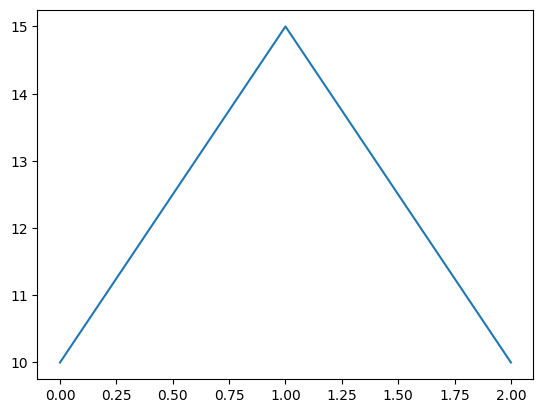

In [2]:
a = [10,15,10]
plt.plot(a)

Quello che succede quando si inseriscono due parametri alla funzione plot, è che i valori del primo parametro vengono posti sull'asse x associandogli quelli del secondo sull'asse y che hanno lo stesso indice:

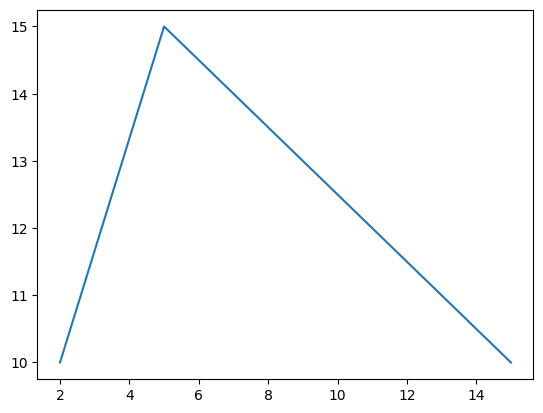

In [3]:
b = [2,5,15]
plt.plot(b,a)

Va dunque considerato come un sistema per plottare array piuttosto che funzioni. **L'applicazione alle funzioni è soltanto un applicazione ed una conseguenza del suo funzionamento**.
Per capire come avviene il plot di funzioni:

In [4]:
z = np.array([2,4,6]) #np.array per creare un array vuole come parametro una lista. 
func = 2 * z # È possibile moltiplicare un array per uno scalare ottenendo un array che ha per ogni indice il prodotto dell'elemento presente in quell'indice per lo scalare. (Nota: il prodotto tra una LISTA ed uno scalare in python estende la lista ripetendo tutti i suoi elementi il numero di volte per cui viene moltiplicata)
print(func)

[ 4  8 12]


Si osserva così che func[1] corrisponde in termini matematici a func(2), func[2] a func(4) e func[3] a func(6), per cui associando a ciascuno di questi valori sull'asse x il corrispettivo falore di func si ottiene effettivamente il plot della funzione!

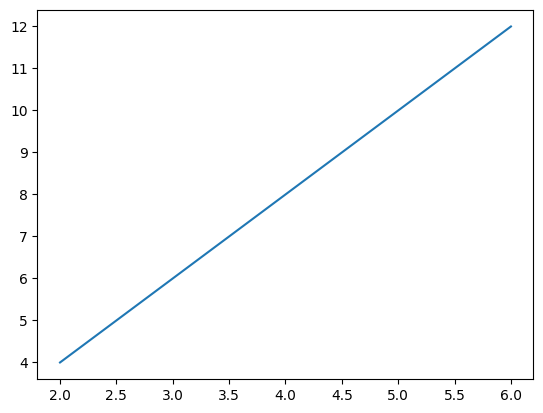

In [5]:
plt.plot(z,func)

Il resto dei punti viene disegnato per interpolazione, infatti disegnando solo i punti la corrispondenza è ancora piu' evidente:

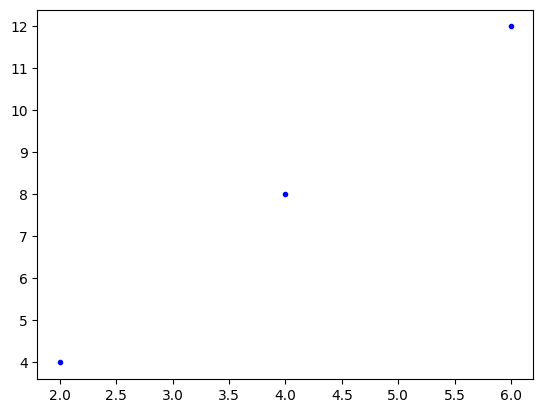

In [6]:
plt.plot(z,func,"b.")

## Regressione lineare univariata
Per prima cosa supponendo di conoscere la funzione reale Y_real a partarire da questa generiamo un dataset che utilizzeremo per allenare il modello, supponendo di avere 100 esempi di partenza. Considereremo di limitarci a valori delle x che vanno da 0 a 2 nel plottare la funzione Y_real e le varie funzioni approssimate.

Per prima cosa supponendo di conoscere la funzione reale Y_real a partarire da questa generiamo un dataset Y che utilizzeremo per allenare il modello, supponendo di avere 100 esempi di partenza. Considereremo di limitarci a valori delle x che vanno da 0 a 2 nel plottare la funzione Y_real e le varie funzioni approssimate.

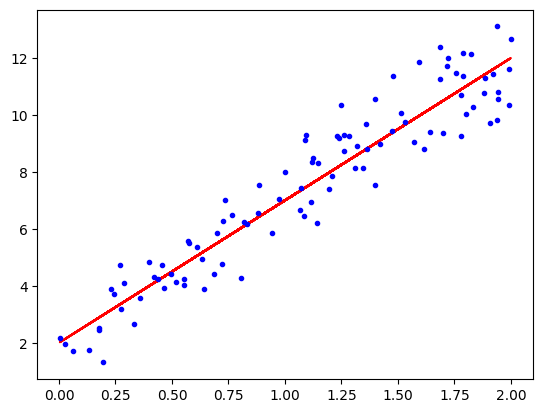

In [7]:
np.random.seed(24)
examples_num = 100 
X = 2 * np.random.rand(examples_num,1) 
Y_REAL = 2 + 5*X
Y = 2 + 5*X + np.random.randn(examples_num,1)# la funzione np.random.randn campiona un valore casuale da una distribuzione normale con media 0 e varianza 1, detto meno in figo un numero probabilmente tra -1 ed 1 (potrebbe essere anche di piu' o di meno ma è poco probabile) che molto probabilmente è vicino allo 0
plt.plot(X,Y_REAL,"r")
plt.plot(X,Y,"b.") # Questi punti saranno quelli che costituiscono il nostro dataset! 

Ora il compito sarà trovare i parametri tali da riuscire ad approssimare al meglio la funzione reale. Questi parametri theta0 e theta1 saranno intercetta e coefficente angolare di una retta, in quanto stiamo ipotizzando che la funzione reale sia una funzione lineare (per cui chiaramente anche la sua approsimazione lo dovrà essere!).
Per fare questo partiamo da due valori casuali di theta0 e theta1.

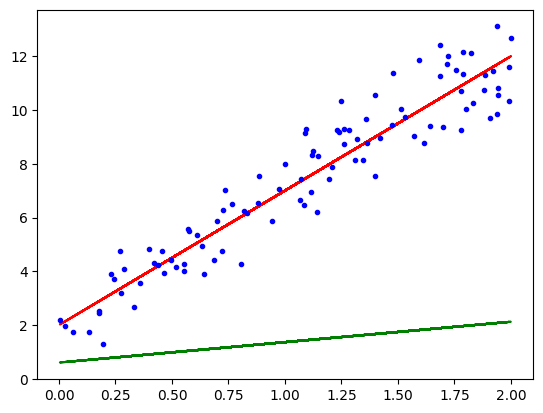

In [8]:
theta0 = np.random.rand(1)
theta1 = np.random.rand(1)
Y_HAT = theta0 + theta1 * X
plt.plot(X,Y_REAL,"r")
plt.plot(X,Y,"b.")
plt.plot(X,Y_HAT,"g")

Osserviamo che non è proprio il massimo! Per migliorare l'approsimazione definiamo la funzione di costo come la funzione errore quadratico medio tra i punti individuati dalla funzione approssimata ed i punti del dataset.
Chiariamo che nell'apprendimento supervisionato data driven **La supervisione è data dal dataset non dalla funzione reale che genera i dati** per cui i confronti si faranno sui punti noti del dataset.

In [9]:
def cost(theta0,theta1,Y,X):
    J = 0
    for i in range(0,examples_num):
        J+=( Y[i]- (theta0+theta1*X[i]) )**2
    return J/examples_num

Data la funzione di costo vogliamo applicare l'algoritmo **Gradient Descent**, per cui avremo bisogno delle sue derivate per sapere come modificare i vari theta ad ogni iterazione!

In [10]:
def dcost0(theta0,theta1,Y,X):
    J = 0
    for i in range(0,examples_num):
        J+=( (theta0+theta1*X[i]) - Y[i] )
    return 2*J/examples_num

def dcost1(theta0,theta1,Y,X):
    J = 0
    for i in range(0,examples_num):
        J+=( (theta0+theta1*X[i]) - Y[i] ) * X[i]
    return 2*J/examples_num

A questo punto impostiamo l'iperparametro alpha learning rate che definisce proporzionalmente quanto spostare theta nella direzione indicata dalle derivate (Aumentando theta con derivate negative e diminuendolo per derivate positive), dopodichè facciamo qualche iterazione!

[2.04820801]
[5.00518655]


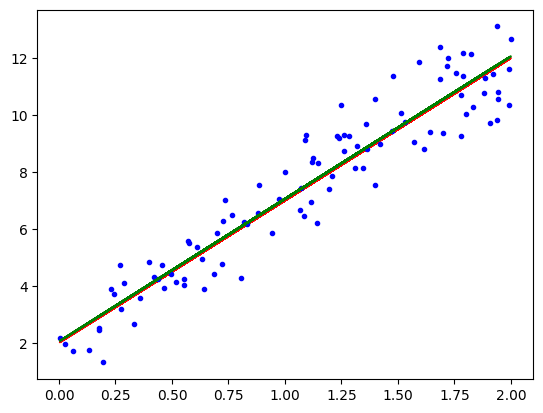

In [18]:
alpha = 0.01
for i in range(0,10):
    step0 = alpha * dcost0(theta0,theta1,Y,X)
    step1 = alpha * dcost1(theta0,theta1,Y,X)
    theta0-=step0
    theta1-=step1
Y_HAT = theta0 + theta1 * X
print(theta0)
print(theta1)
plt.plot(X,Y_REAL,"r")
plt.plot(X,Y,"b.")
plt.plot(X,Y_HAT,"g")

## Osserviamo che aumentando manualmente il numero di interazioni nel ciclo nella cella di sopra la nostra funzione approssima sempre meglio la funzione reale!
Notiamo che possiamo impostare l'iperparametro gamma che indica una soglia di convergenza:
nota: ho messo il valore assoluto della differenza del valore di J perchè sennò non considerava veramente quanto fossero diversi, sarebbe funzionata solo per differenze positive!

[2.04820801]
[5.00518655]


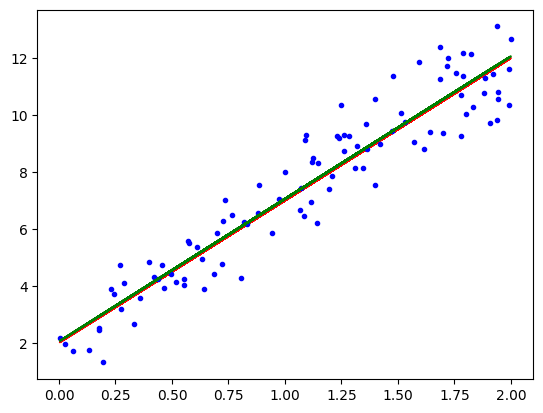

In [21]:
gamma = 0.001
theta0_tmp = -1000
theta1_tmp = -1000

while( abs((cost(theta0,theta1,Y,X) - cost(theta0_tmp,theta1_tmp,Y,X))) > gamma ):
    step0 = alpha * dcost0(theta0,theta1,Y,X)
    step1 = alpha * dcost1(theta0,theta1,Y,X)
    theta0_tmp = theta0
    theta1_tmp = theta1
    theta0-=step0
    theta1-=step1
print(theta0)
print(theta1)
plt.plot(X,Y_REAL,"r")
plt.plot(X,Y,"b.")
plt.plot(X,Y_HAT,"g")

**Come vediamo funziona da dio :)**